<a href="https://colab.research.google.com/github/PeiLi-Sandman/machine_learning/blob/master/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [47]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-17 23:34:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  68.7MB/s    in 1.0s    

2019-04-17 23:34:55 (68.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3))

last_output = conv_base.output

In [0]:
conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False

In [0]:
from keras.layers import Flatten, Dense, Dropout
from keras import models
from keras import optimizers
from tensorflow.keras import Model


new = Flatten()(last_output)
new = Dense(256, activation='relu')(new)
new = Dense(1, activation='sigmoid')(new)

# Configure and compile the model
model = models.Model(conv_base.input, new)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [54]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 36s 357ms/step - loss: 0.5704 - acc: 0.6910 - val_loss: 0.4367 - val_acc: 0.7920
Epoch 2/30
100/100 [==============================] - 33s 327ms/step - loss: 0.4549 - acc: 0.7915 - val_loss: 0.3259 - val_acc: 0.8650
Epoch 3/30
100/100 [==============================] - 32s 320ms/step - loss: 0.4286 - acc: 0.7930 - val_loss: 0.2935 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 33s 335ms/step - loss: 0.3924 - acc: 0.8185 - val_loss: 0.2715 - val_acc: 0.8800
Epoch 5/30
100/100 [==============================] - 32s 323ms/step - loss: 0.3689 - acc: 0.8290 - val_loss: 0.2903 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 32s 318ms/step - loss: 0.3562 - acc: 0.8450 - val_loss: 0.2968 - val_acc: 0.8770
Epoch 7/30
100/100 [==============================] - 33s 329ms/step - loss: 0.3473 - acc: 0.8470 - val_loss: 0.2873 - val_acc: 0.8770
Epoch 8/30
100/100 [==============================] - 3

In [0]:
model.save('model of problem 1.h5')

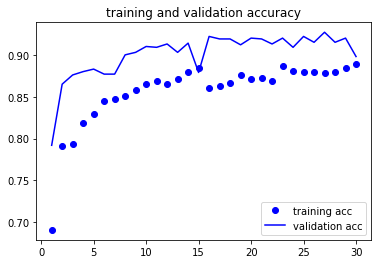

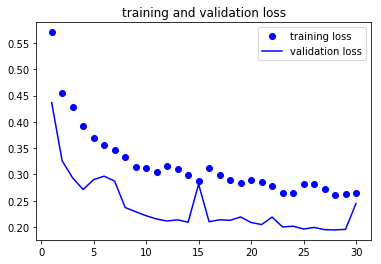

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

# Problem 2

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [56]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 37s 366ms/step - loss: 0.5186 - acc: 0.7465 - val_loss: 0.2910 - val_acc: 0.8780
Epoch 2/30
100/100 [==============================] - 35s 352ms/step - loss: 0.3336 - acc: 0.8520 - val_loss: 0.1914 - val_acc: 0.9220
Epoch 3/30
100/100 [==============================] - 34s 338ms/step - loss: 0.2707 - acc: 0.8910 - val_loss: 0.2387 - val_acc: 0.9020
Epoch 4/30
100/100 [==============================] - 35s 346ms/step - loss: 0.2305 - acc: 0.9000 - val_loss: 0.1386 - val_acc: 0.9430
Epoch 5/30
100/100 [==============================] - 33s 335ms/step - loss: 0.2182 - acc: 0.9000 - val_loss: 0.1306 - val_acc: 0.9440
Epoch 6/30
100/100 [==============================] - 34s 343ms/step - loss: 0.1903 - acc: 0.9245 - val_loss: 0.1156 - val_acc: 0.9530
Epoch 7/30
100/100 [==============================] - 34s 342ms/step - loss: 0.1756 - acc: 0.9290 - val_loss: 0.1052 - val_acc: 0.9580
Epoch 8/30
100/100 [==============================] - 3

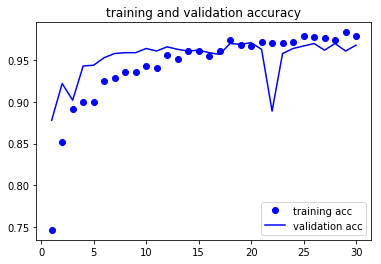

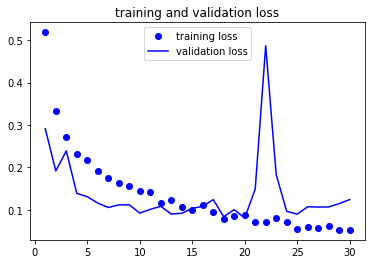

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

#Problem 3

In [59]:
!ls /tmp/cats_and_dogs_filtered/validation/cats | head -3
!ls /tmp/cats_and_dogs_filtered/validation/dogs | head -3

cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
dog.2000.jpg
dog.2001.jpg
dog.2002.jpg


In [0]:
img_path1 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg'
img_path2 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2001.jpg'
img_path3 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2000.jpg'
img_path4 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2001.jpg'

In [0]:
last_conv_layer = model.get_layer('block5_conv4')

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

In [0]:
def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)

In [0]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  #
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  #
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  class_output = model.output[:, 0]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  #
  show_superimposed_image(img_path, heatmap)

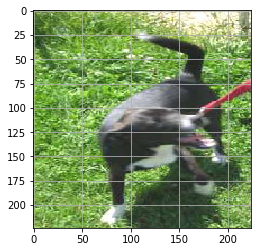

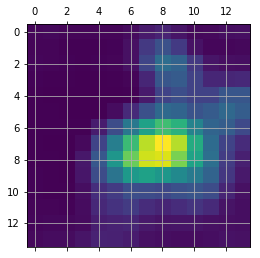

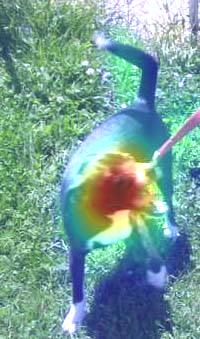

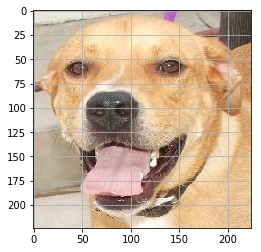

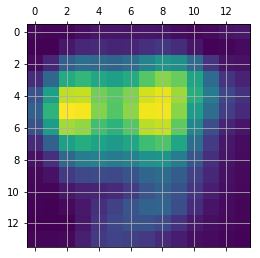

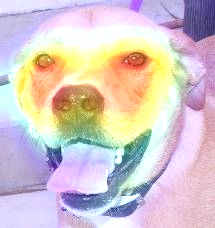

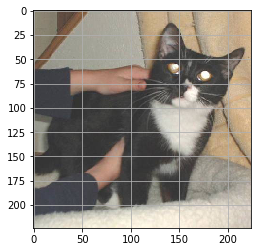

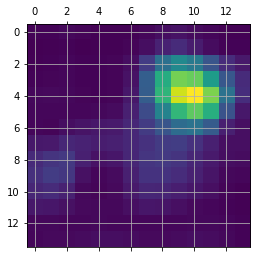

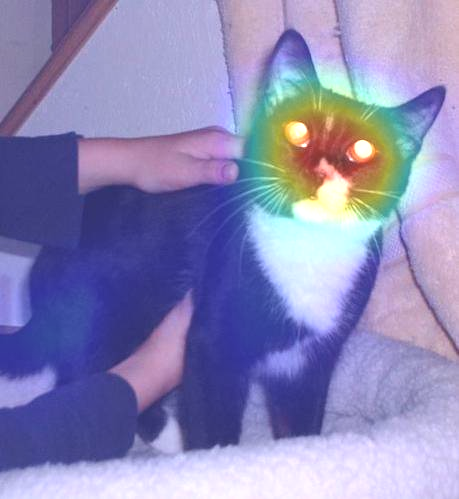

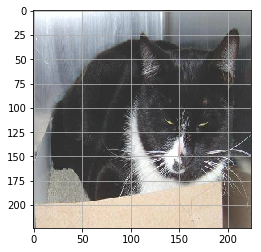

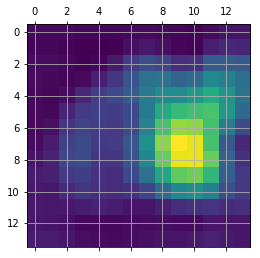

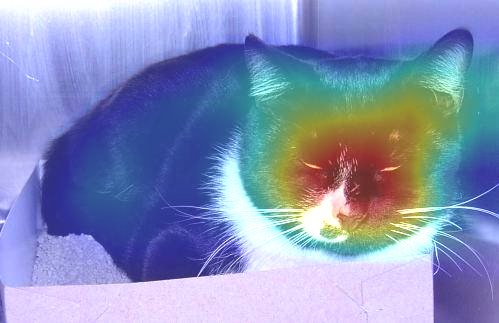

In [65]:
process_image(img_path1)
process_image(img_path2)
process_image(img_path3)
process_image(img_path4)

#Problem 4

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
class_names = ['cat','dog']

In [69]:
from keras import models

layer = model.get_layer('dense_5')

#layer_outputs = [layer.output for layer in model.layers[1:-4]]

layer_outputs = layer.output

activation_model = models.Model(input=model.input, outputs=layer_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [0]:
labels = validation_generator.classes

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

In [0]:
activations = activation_model.predict_generator(validation_generator, steps=50)

In [0]:
def data_scatter(vecs, labels):
 
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=16)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

In [83]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 7.487098455429077 seconds


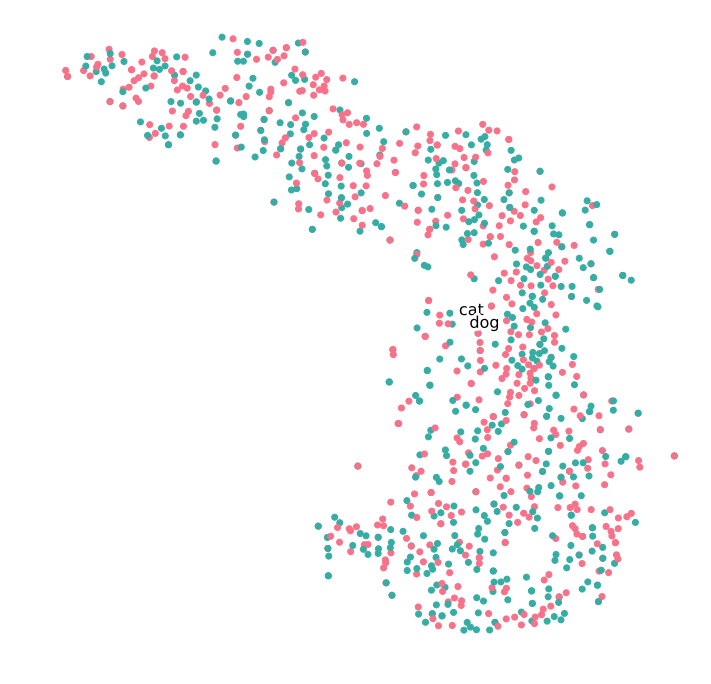

In [84]:
labels = validation_generator.classes
np.random.shuffle(labels)
labels = labels[:1000]
data_scatter(fashion_tsne, labels)